<a href="https://colab.research.google.com/github/yasirumakavita/ML-SESSION-DOCS/blob/main/ML_SESSION_CLASSIFICATION_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML SESSION 3 - NOTEBOOK
CLASSIFICATION


##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

##Loading Data

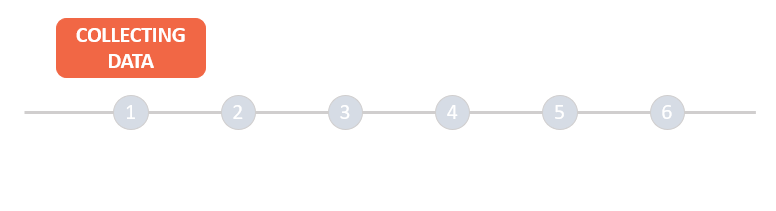

In [2]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data'

# Load CSV File
data = pd.read_csv(file_name, header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#Assigning column names

colum_headers = ['animal name', 'hair',	'feathers', 'eggs',	'milk',	'airborne',	'aquatic','predator',	'toothed'	,'backbone',	
                  'breathes',	'venomous',	'fins',	'legs',	'tail',	'domestic', 'catsize', 'animal_type']

data.columns = colum_headers

data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


##Data Preparation

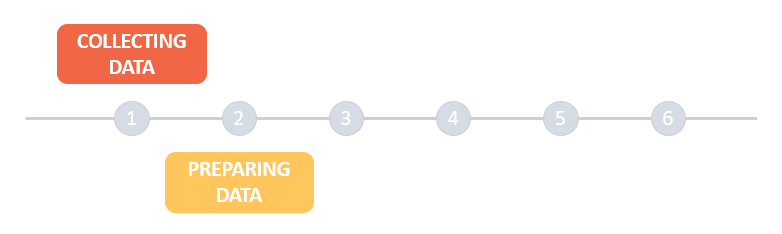

2.0 - Exploring Data

In [4]:
#How many records are there ?

data.shape      #Returns number of rows, columns

(101, 18)

In [5]:
#What are the data types present

data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
animal_type     int64
dtype: object

2.1 - Treating missing values

In [6]:
#Searching for missing values

#data.isin(['?']).value_counts()
#data[data.values == '?']

In [7]:
#Dropping the rows with missing values

#data.drop(labels=[5, 27, 84, 195], axis=0, inplace=True)

2.0 - Exploring data

In [8]:
#What are the unique values available?

#data['animal name'].unique()

#data['animal_type'].unique()

In [9]:
#How many data points are there under each unique?

#data['animal_type'].value_counts()

#data['animal name'].value_counts()

In [10]:
#Display the frequncy table as a bar plot
#data['animal_type'].hist()

In [11]:
#data.describe(include = 'all')
#data.describe()

2.2 - Adding new data

In [12]:
#Add a column with animal type names

replace_dict = {
				  1: 'mammal', 
				  2: 'bird', 
				  3: 'snake', 
				  4: 'fish', 
				  5: 'amphibian', 
				  6: 'insect', 
				  7: 'other invertebrates'}

data['animal_type_name'] = data['animal_type'].replace(replace_dict)
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal


2.4 - visualising data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38a7a518d0>,
      dtype=object)

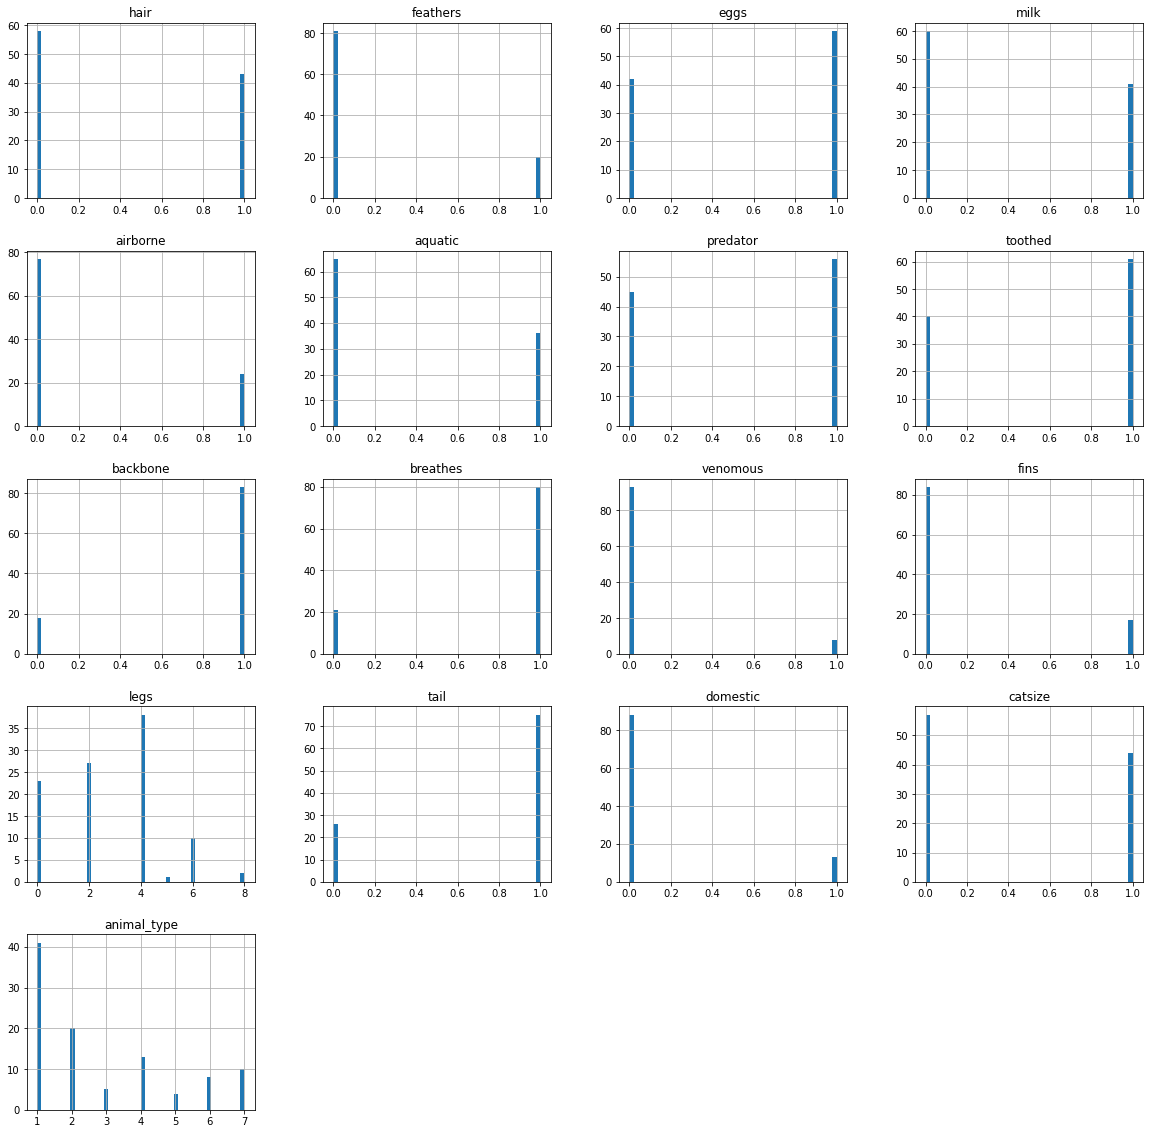

In [13]:
data.hist(bins=50, figsize=(20, 20))

2.5 - Treating outliers

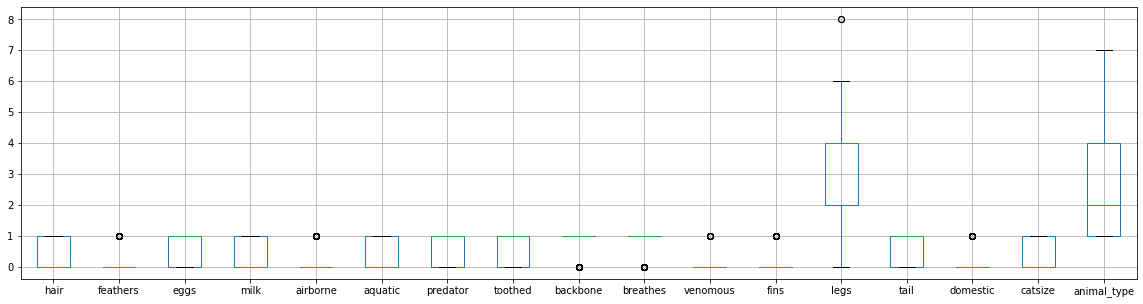

In [14]:
#Box plots

Column_names = ['hair',	'feathers', 'eggs',	'milk',	'airborne',	'aquatic','predator',	'toothed'	,'backbone',	
                  'breathes',	'venomous',	'fins',	'legs',	'tail',	'domestic', 'catsize', 'animal_type']

data.boxplot(Column_names, figsize=(20, 5))

2.6 - Feature selection

In [15]:
data[data.values == 'fish']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,fish
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,fish
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,fish
38,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
60,pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,fish
61,piranha,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,fish


In [16]:
#data.at[(90,91),'animal_type']=8

In [17]:
data[data.values == 'snake']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
62,pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3,snake
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3,snake
80,slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3,snake
90,tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3,snake
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3,snake


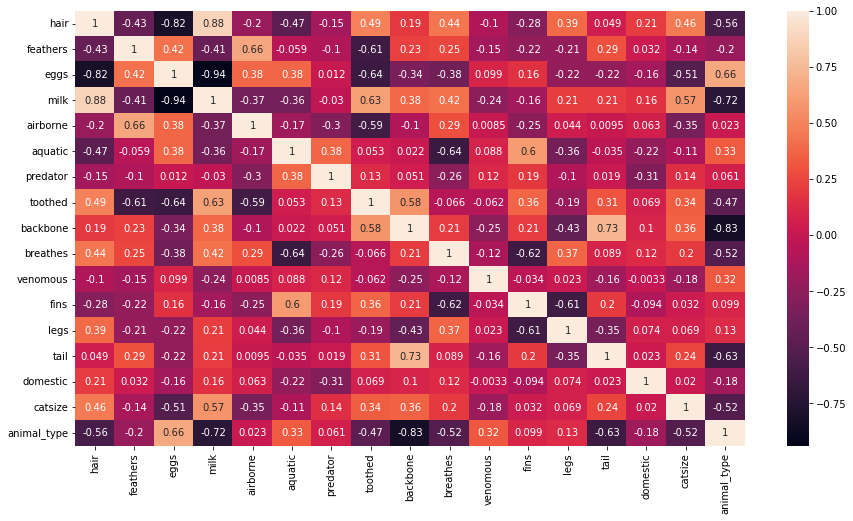

In [18]:
#Correlation matrics
correlation_matrix = data.corr()

plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
#correlation_matrix

In [19]:
# sns.pairplot(data=data[Column_names], hue='animal_type', markers='+')
# plt.show()